In [53]:
import sklearn
import sklearn.datasets as ds
from sklearn import neighbors, svm, tree, linear_model, ensemble, neural_network
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import time

In [13]:
pd.set_option("max_columns",90, "max_rows", 90)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [21]:
X, y = ds.load_iris(return_X_y=True)

In [ ]:
y

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

In [34]:
def print_accuracy(f):
    print(f"Accuracy = {100*np.sum(f(X_test) == Y_test)/len(Y_test)}%")
    time.sleep(0.5) # to let the print get out before any progress bars

### K-nearest neighbors

In [35]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

print_accuracy(knn.predict)

Accuracy = 96.66666666666667%


### Support vector machine with a linear kernel

In [39]:
svc_linear = svm.SVC(kernel='linear', probability=True)
svc_linear.fit(X_train, Y_train)
print_accuracy(svc_linear.predict)

Accuracy = 100.0%


### Support vector machine with a radial basis function kernel

In [43]:
svc_linear = svm.SVC(kernel='rbf', probability=True)
svc_linear.fit(X_train, Y_train)
print_accuracy(svc_linear.predict)

Accuracy = 100.0%


### Logistic regression

In [48]:
linear_lr = linear_model.LogisticRegression()
linear_lr.fit(X_train, Y_train)
print_accuracy(linear_lr.predict)

Accuracy = 96.66666666666667%


### Decision tree

In [46]:
dtree = tree.DecisionTreeClassifier(min_samples_split=2)
dtree.fit(X_train, Y_train)
print_accuracy(dtree.predict)

Accuracy = 100.0%


### Random Forest

In [59]:
rforest = ensemble.RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, Y_train)
print_accuracy(rforest.predict)

Accuracy = 100.0%


### Neural network

In [60]:
nn = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, Y_train)
print_accuracy(nn.predict)

Accuracy = 96.66666666666667%


In [63]:
import shap

ModuleNotFoundError: No module named 'shap'

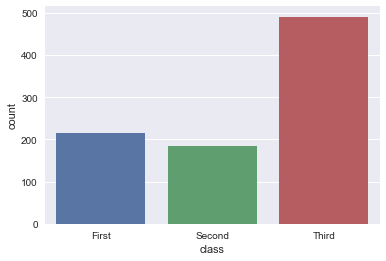

In [65]:
import seaborn as sns
sns.set(style='darkgrid')
titanic = sns.load_dataset('titanic')
ax = sns.countplot(x='class', data=titanic)

In [66]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
